## 1. Análise exploratória dos dados

In [41]:
from IPython.display import display, Markdown
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [42]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/main/diamonds.csv")
sns.set(style="whitegrid")
colors = ['#FF6347', '#FFD700', '#32CD32', '#4682B4', '#8A2BE2']
custom_colormap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/main/diamonds.csv")
df = sns.load_dataset('diamonds')
df.to_csv("../data/raw/data.csv", index=False)


**A tabela a seguir mostra as 5 colunas iniciais e finais, além do total de colunas e linhas**

In [17]:
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Na próxima tabela se tem uma visão geral da diversidade de dados deste conjunto de dados**

In [44]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

**A seguir pode-se ver o tipo de cada um dos dados**

In [30]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

**Na tabela seguinte percebe-se que não há dados nulos**

In [31]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Informações estatísticas**

Abaixo podemos acompanhar a quantidade, média, desvio padrão, valor mínimo, os quartis e o valor máximo, respectivamente.

In [33]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2. Descrição dos dados


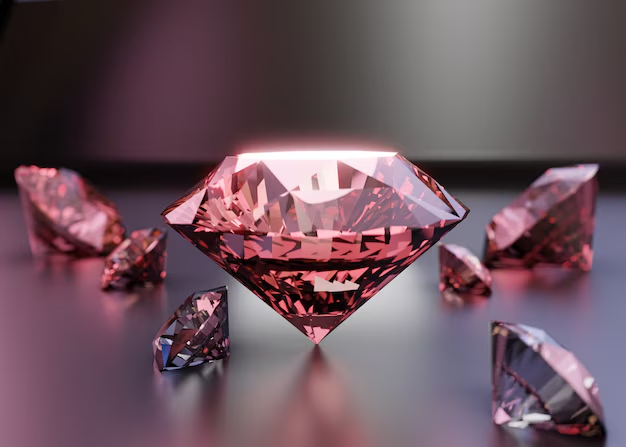


Os dados são os preços de mais de 50.000 diamantes de lapidação redonda. No conjunto de dados temos acesso as seguintes características:

* Peso, Qualidade do corte , Cor, Medida do quão claro é o diamante, Porcentagem total de profundidade, Largura do topo do diamante em relação ao ponto mais largo, Preço em dolar americano, Comprimento, Largura e Profundidade. 

## 2.1. Dicionário dos dados

In [43]:
data_path = Path("../data/external/dictionary.csv", index = False)
df_dict = pd.read_csv(data_path, sep=',')

df_dict

,variavel,descricao,tipo,subtipo
0,carat,peso do diamante,quantitativa,continua
1,cut,"qualidade do corte (Fair, Good, Very Good, Pre...",qualitativa,ordinal
2,color,cor do diamante de D(melhor) a J (pior),qualitativa,ordinal
3,clarity,uma medida de quão claro é o diamante (I1 (pio...,qualitativa,ordinal
4,depth,porcentagem total de profundidade,quantitativa,continua
5,table,largura do topo do diamante em relação ao pont...,quantitativa,discreta
6,price,preço do diamante em dolar americano,quantitativa,continua
7,x,comprimento do diamante em mm (0--10.74),quantitativa,continua
8,y,largura do diamante em mm (0--58.9),quantitativa,continua
9,z,profundidade do diamante em mm (0--31.8),quantitativa,continua


A tabela expõe 10 variáveis sendo 3 qualitativas e 7 quantitativas
***

## 2.2 Visualização dos dados

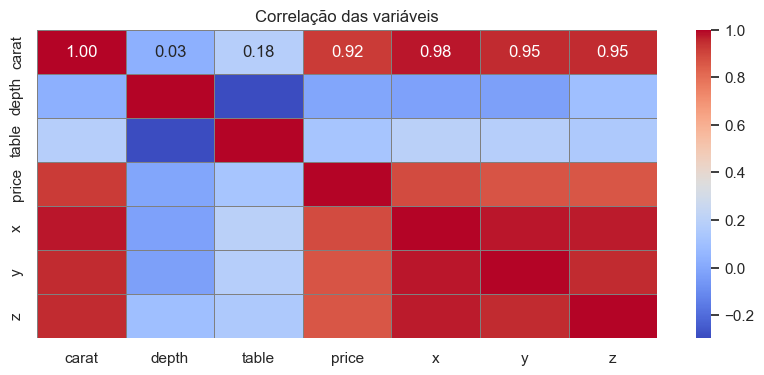


Correlação das características com o preço:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [75]:
df_numeric = df.select_dtypes(include=[np.number])
correlacao = df_numeric.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(
    correlacao, 
    annot=True,  
    cmap='coolwarm', 
    fmt=".2f",  
    linewidths=0.5, 
    linecolor='gray' 
    
)

plt.title('Correlação das variáveis')
plt.show()

correlacao_price_caracteristicas = correlacao['price'].sort_values(ascending=False)
print("\nCorrelação das características com o preço:")
print(correlacao_price_caracteristicas)

***
Após analisar o gráfico e a tabela, fica evidente que há uma relação entre algumas variáveis quantitativas e o preço dos diamantes, embora essa relação não seja universal para todas as variáveis. As variáveis que apresentam uma conexão mais significativa com o preço são o comprimento do diamante em milímetros e seu peso. Isso é compreensível, pois diamantes maiores tendem a ser mais pesados, o que pode explicar a correlação entre essas medidas e o preço.
***

**Visualização da distribuição das variáveis qualitativas**

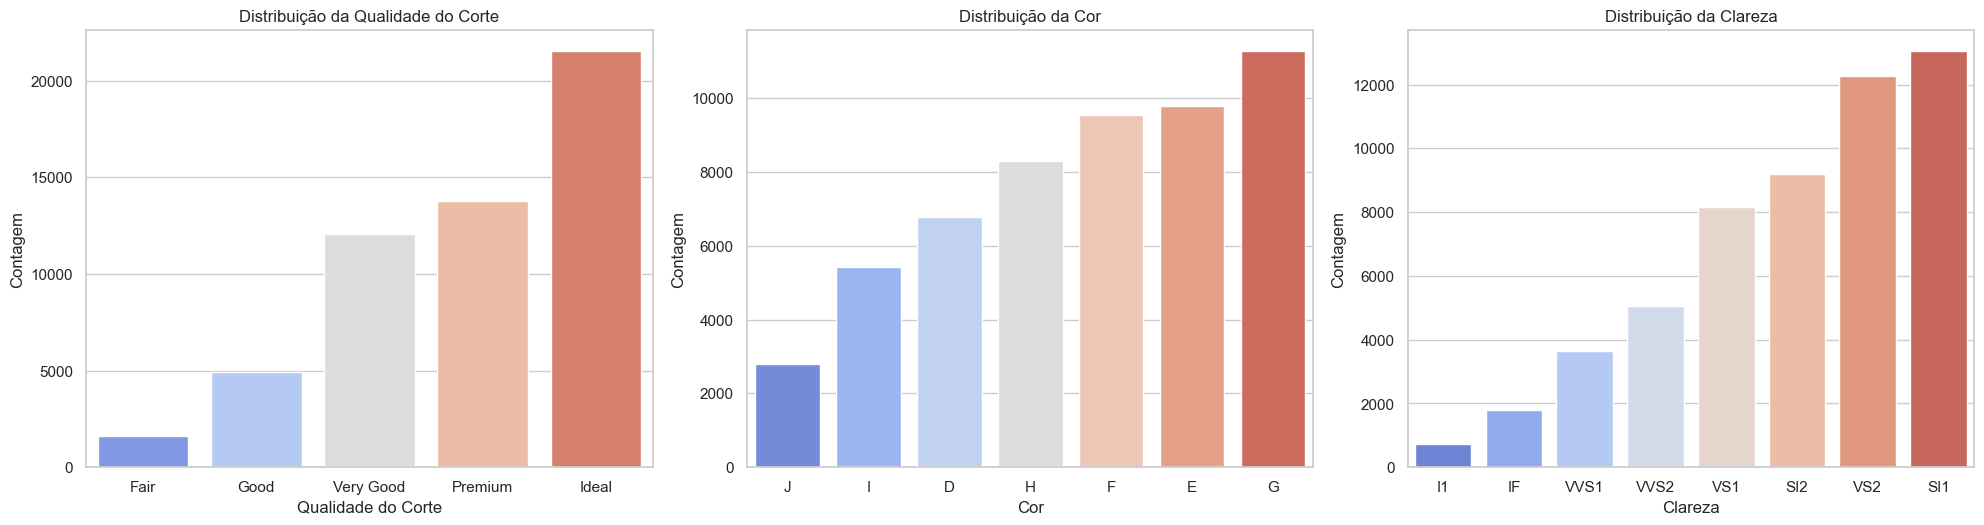

In [66]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
cut_order = diamonds['cut'].value_counts().sort_values().index
sns.countplot(x='cut', data=diamonds, order=cut_order, palette='coolwarm')
plt.title('Distribuição da Qualidade do Corte')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Contagem')

plt.subplot(3, 3, 2)
color_order = diamonds['color'].value_counts().sort_values().index
sns.countplot(x='color', data=diamonds, order=color_order, palette='coolwarm')
plt.title('Distribuição da Cor')
plt.xlabel('Cor')
plt.ylabel('Contagem')

plt.subplot(3, 3, 3)
clarity_order = diamonds['clarity'].value_counts().sort_values().index
sns.countplot(x='clarity', data=diamonds, order=clarity_order, palette='coolwarm')
plt.title('Distribuição da Clareza')
plt.xlabel('Clareza')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

*Qualidade do Corte:*
- A qualidade de corte mais prevalente é "Ideal", que representa a classificação mais alta disponível para diamantes.

*Cor dos Diamantes:*
- A qualidade das cores segue a ordem de D, E, F, G, H, I, J, do melhor para o pior. A cor mais comum é a "G", que é a quarta melhor na escala de qualidade.

*Clareza dos Diamantes:*
- A ordem de qualidade da clareza, sendo do melhor para o pior : IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1. A terceira classificação mais baixa, "SI1", é a que possui o maior número de diamantes no dataset.
  
***

**Visualização da distribuição das variáveis quantitativas**

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

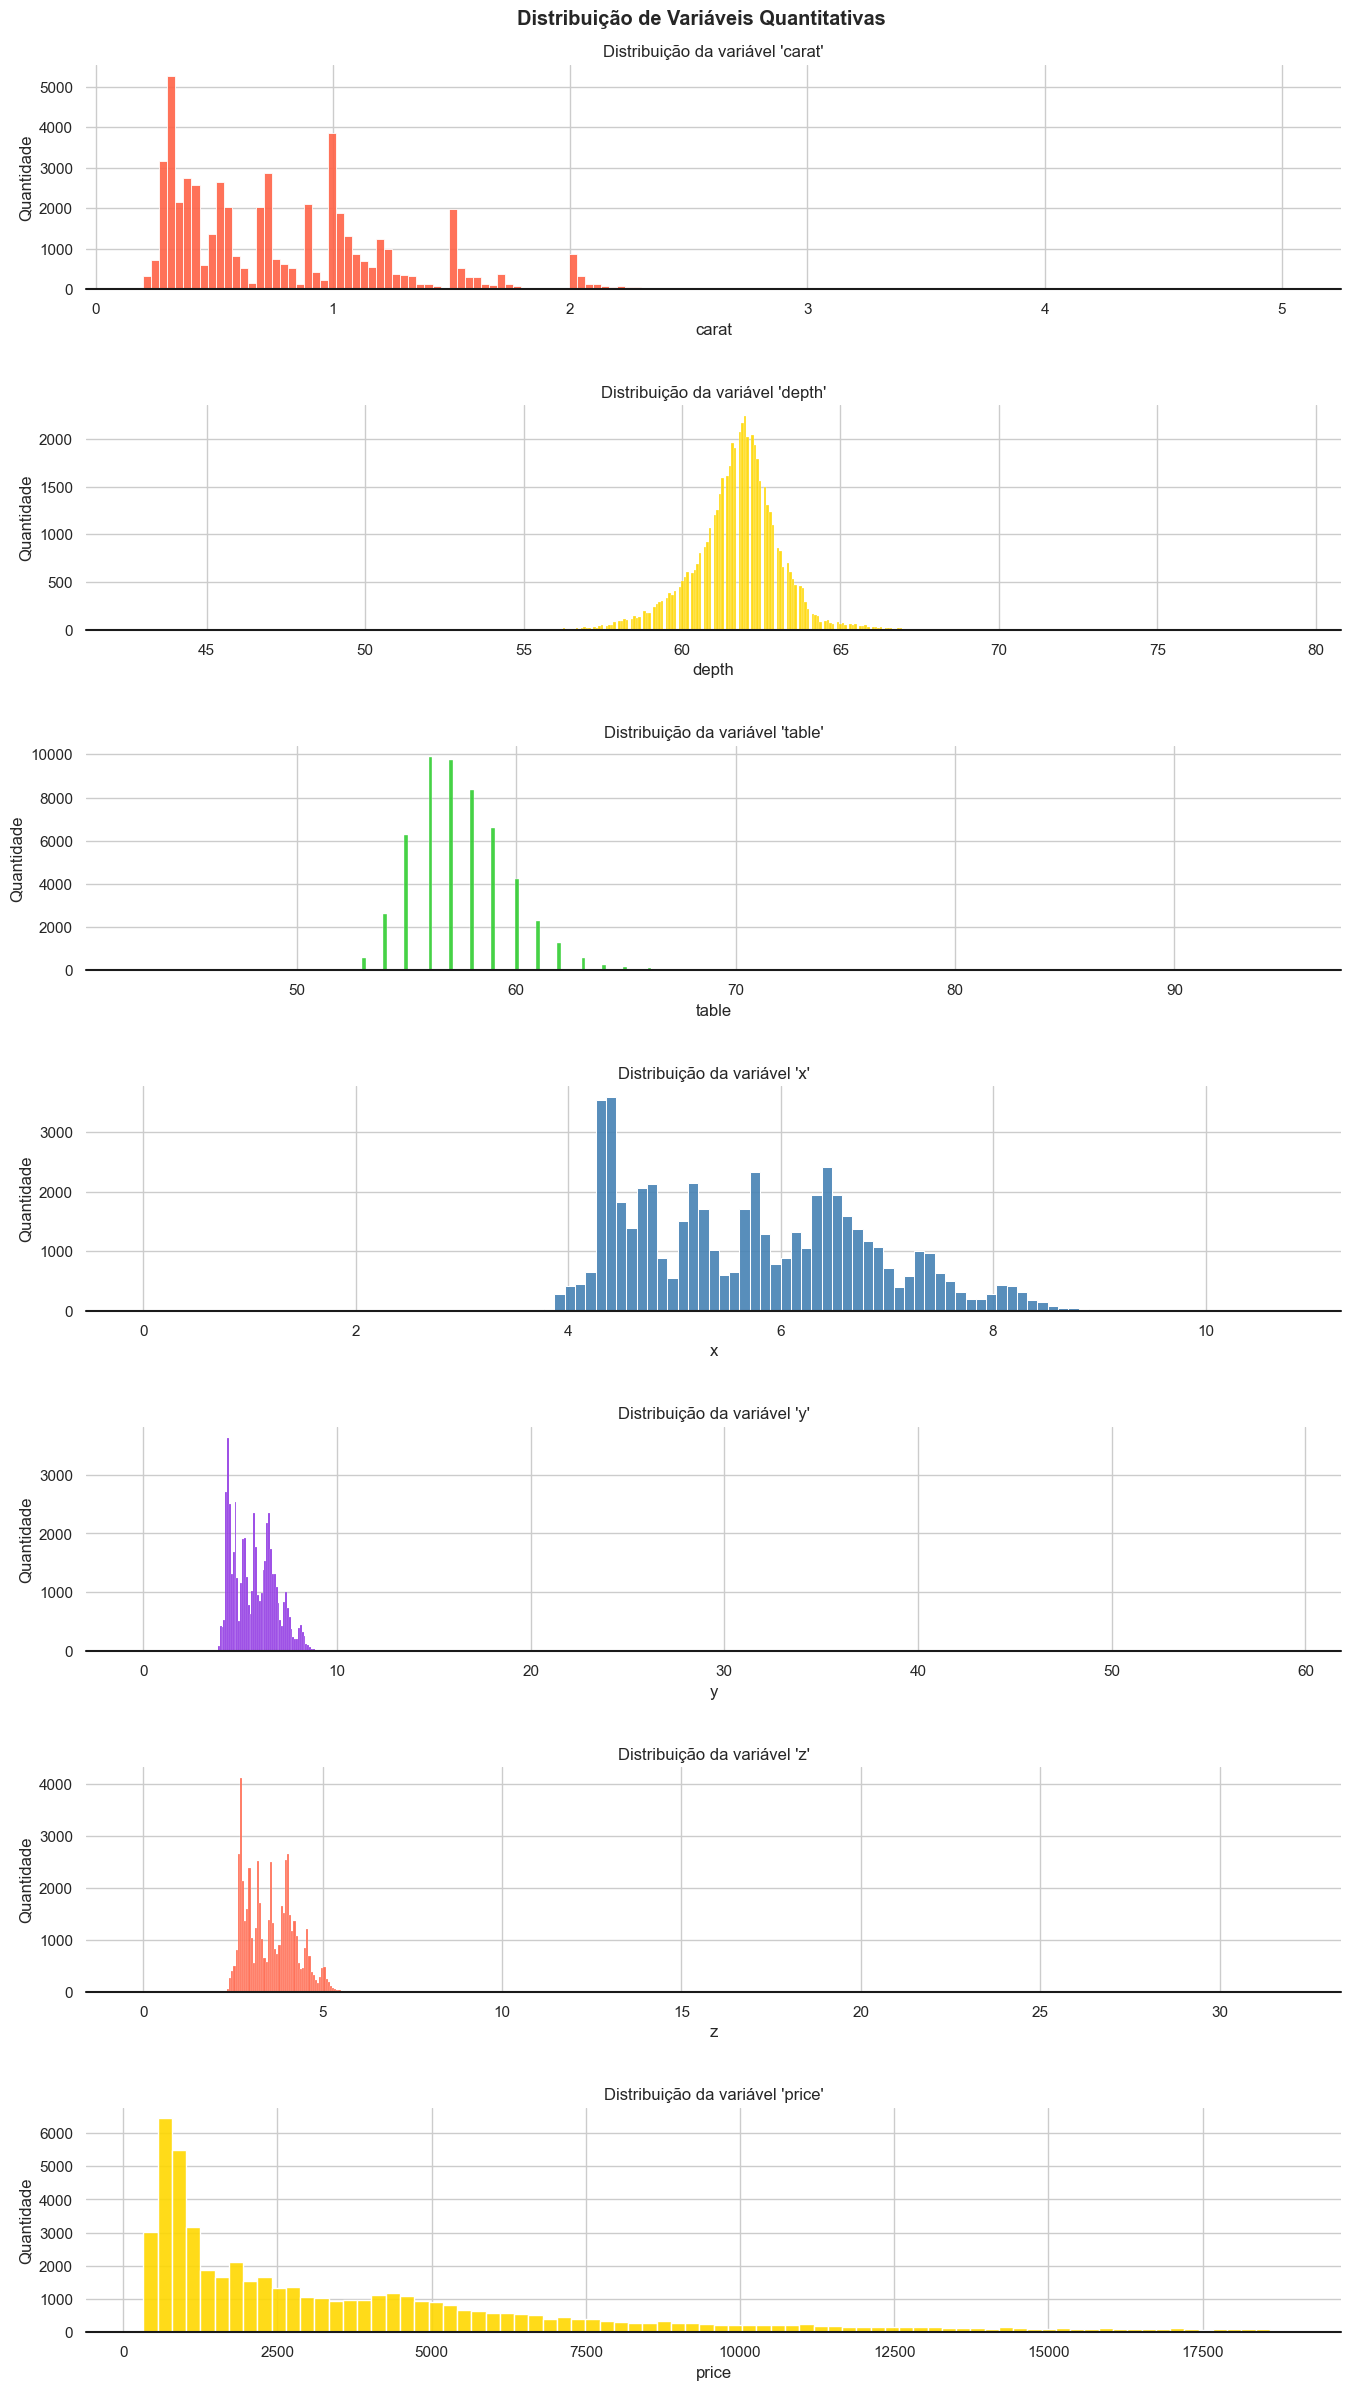

In [16]:
quant_vars = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


fig, axes = plt.subplots(len(quant_vars), 1, figsize=(15, 25))
plt.tight_layout(pad=6, w_pad=4, h_pad=5)
fig.suptitle('Distribuição de Variáveis Quantitativas', fontweight='bold')


for i, variavel in enumerate(quant_vars):
    ax = sns.histplot(
        data=diamonds,
        x=variavel,
        ax=axes[i],
        color=colors[i % len(colors)], 
        alpha=0.9
    )

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

*Quilates dos Diamantes:*

- Existe uma ampla variação no peso dos diamantes (medido em quilates), indicando que o dataset inclui diamantes de diferentes tamanhos.

*Distribuição da Profundidade Total:*

- A distribuição da variável "Profundidade Total" (depth) apresenta uma tendência a seguir uma curva normal, sugerindo que a maioria dos diamantes tem profundidades que estão concentradas em torno da média.

*Distribuição da Largura:*

- A variável table mostra que a maioria dos diamantes possui largurasentre 50% e 60%, com uma concentração maior nesse intervalo.

*Distribuição dos Preços:*

- Os preços dos diamantes variam amplamente, mas a maioria dos diamantes tem preços inferiores a 5.000 dólares, indicando que o valor médio dos diamantes é relativamente baixo.

*Comprimento dos Diamantes:*

- O comprimento dos diamantes varia principalmente entre 4 e 8 mm, mostrando que a maioria dos diamantes tem comprimentos nessa faixa.

*Largura dos Diamantes:*

- A largura dos diamantes não ultrapassa 10 mm, sugerindo que a maioria dos diamantes possui larguras abaixo desse limite.

*Profundidade dos Diamantes:*

- A profundidade dos diamantes quase nunca excede 6 mm, indicando que a maior parte dos diamantes tem profundidades abaixo desse valor.
 ***

## 3. Perguntas de partida, hipóteses e justificativas

*Existe uma diferença estatisticamente significativa nos preços entre as diferentes categorias de qualidade de corte?*

- Hipótese: Diamantes com uma classificação de corte melhor (Ideal ou Premium) têm preços mais altos do que aqueles com classificações inferiores (Regular ou Bom).
Justificativa: A qualidade do corte afeta o brilho e a estética do diamante, o que geralmente resulta em um preço mais alto.
    
*Há alguma variação significativa nos preços entre as categorias de cor?*

- Hipótese: Diamantes com cores mais próximas de D (melhor) são vendidos a preços mais altos do que aqueles com cores mais distantes de D.
Justificativa: A cor afeta a raridade e o valor do diamante e cores mais raras são tipicamente mais valorizadas.
    
*Como o preço varia com a clareza do diamante (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)?*

- Hipótese: Diamantes com clareza mais alta (IF, VVS1) são vendidos a preços mais altos em comparação com aqueles com clareza inferior (I1, SI2).
Justificativa: Clareza indica a presença de inclusões e imperfeições, diamantes com menos imperfeições são mais valiosos.

*As medidas do diamante influenciam o preço ?*

 - Hipótese: Diamantes com maiores medidas possuem o maior preço.
Justificativa: Medidas maiores indicam peso maior, tornando-os mais valiosos.

***


## 3.1. Análise das hipóteses

**Analisando as hipóteses sobre as variáveis qualitativas**




C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


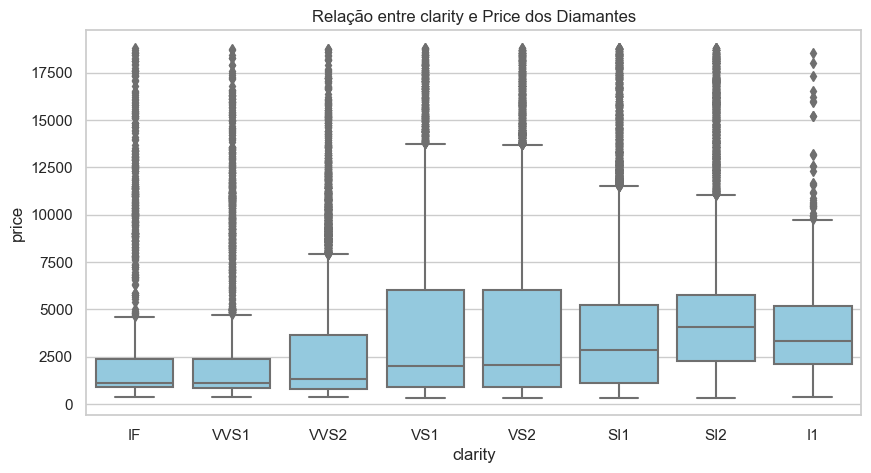

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


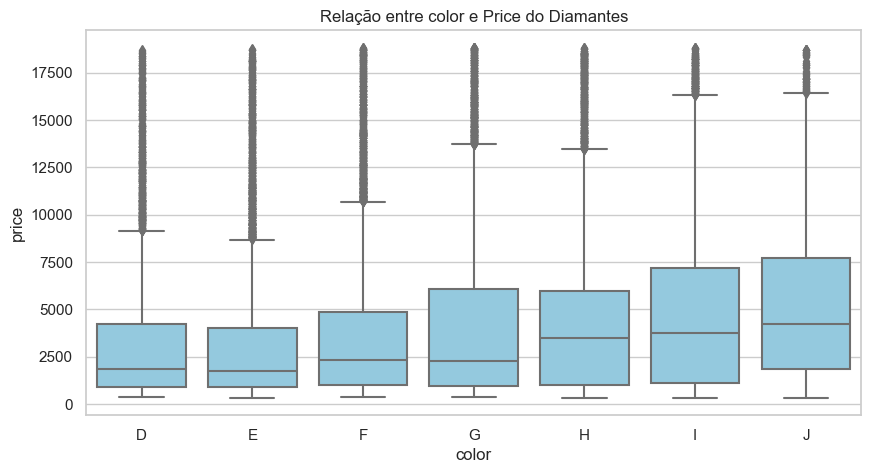

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


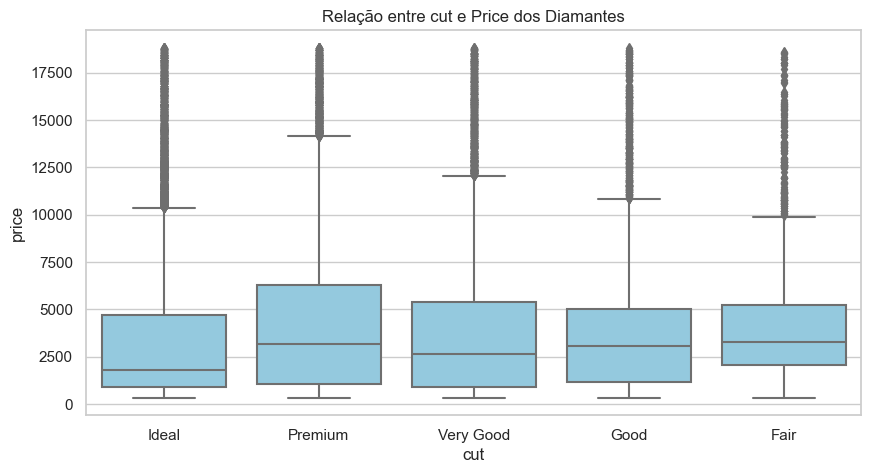


A partir dessas informações, observamos que as variáveis 'clarity', 'color' e 'cut' não apresentam uma relação consistente com o preço. Por exemplo, se 'clarity' influenciasse significativamente o preço, esperaríamos que a caixa para a clareza 'IF' fosse maior do que as das outras categorias. Da mesma forma, se a cor tivesse um impacto direto no preço, o valor médio dos diamantes com cor 'D' (a melhor) deveria ser mais alto, mas, na prática, encontramos preços mais elevados para diamantes com cor 'J' (a pior). Quanto à variável 'cut', esperaríamos que os diamantes com corte 'Ideal' tivessem os preços mais altos, mas essa tendência não é observada nos dados.

 ---

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='clarity', y='price', color='skyblue')
plt.title('Relação entre clarity e Price dos Diamantes')
plt.xlabel('clarity')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='color', y='price', color='skyblue')
plt.title('Relação entre color e Price do Diamantes')
plt.xlabel('color')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cut', y='price', color='skyblue')
plt.title('Relação entre cut e Price dos Diamantes')
plt.xlabel('cut')
plt.ylabel('price')
plt.show()

display(Markdown(
    "\n"
    f"A partir dessas informações, observamos que as variáveis 'clarity', 'color' e 'cut' não apresentam uma relação consistente com o preço. Por exemplo, se 'clarity' influenciasse significativamente o preço, esperaríamos que a caixa para a clareza 'IF' fosse maior do que as das outras categorias. Da mesma forma, se a cor tivesse um impacto direto no preço, o valor médio dos diamantes com cor 'D' (a melhor) deveria ser mais alto, mas, na prática, encontramos preços mais elevados para diamantes com cor 'J' (a pior). Quanto à variável 'cut', esperaríamos que os diamantes com corte 'Ideal' tivessem os preços mais altos, mas essa tendência não é observada nos dados."
    "\n\n ---"
))



**Analisando as hipóteses sobre as variáveis quantitativas**




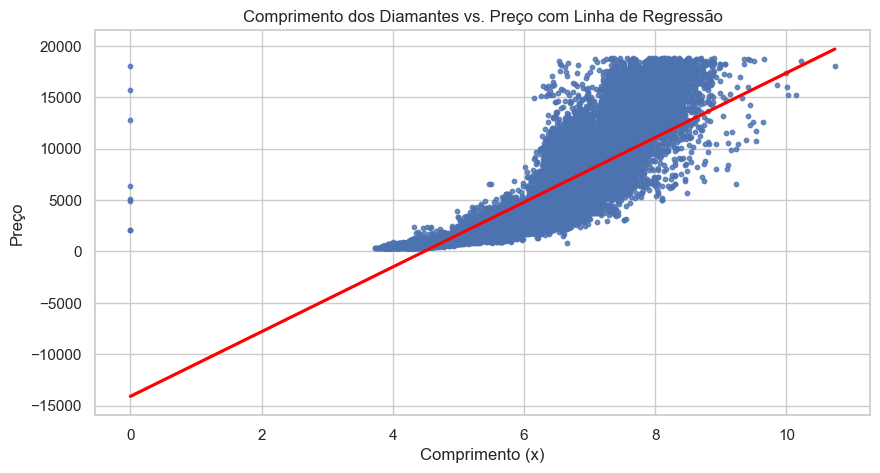

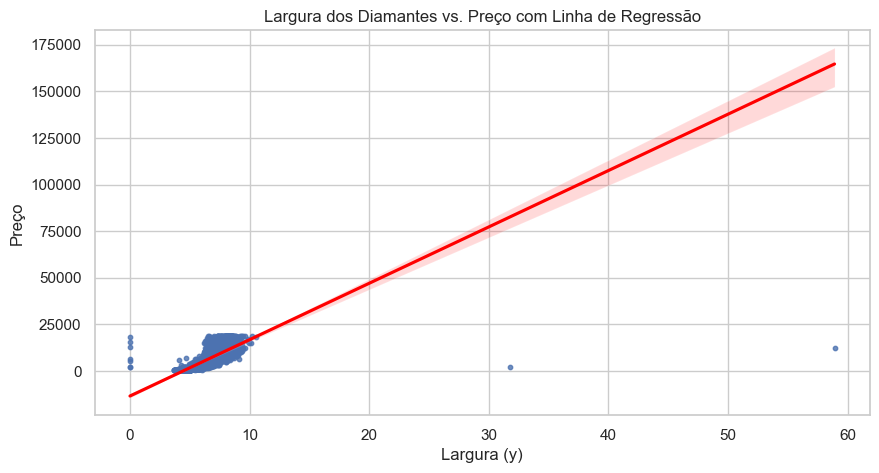

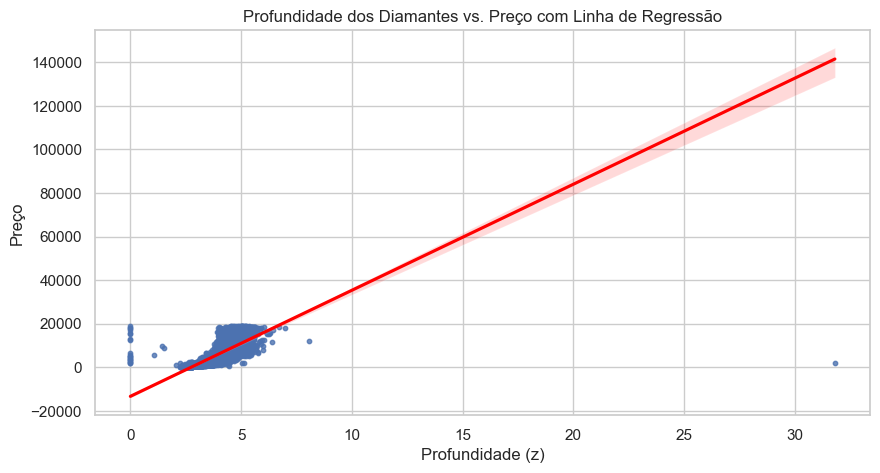


 A análise dos gráficos confirma que há uma relação positiva entre as medidas dos diamantes e seu preço, com comprimento e largura mostrando uma correlação mais forte em comparação com a profundidade.

 ---

In [67]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='x', y='price', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Comprimento dos Diamantes vs. Preço com Linha de Regressão')
plt.xlabel('Comprimento (x)')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='y', y='price', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Largura dos Diamantes vs. Preço com Linha de Regressão')
plt.xlabel('Largura (y)')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='z', y='price', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Profundidade dos Diamantes vs. Preço com Linha de Regressão')
plt.xlabel('Profundidade (z)')
plt.ylabel('Preço')
plt.show()

display(Markdown(
    "\n"
    f" A análise dos gráficos confirma que há uma relação positiva entre as medidas dos diamantes e seu preço, com comprimento e largura mostrando uma correlação mais forte em comparação com a profundidade."
    "\n\n ---"
))



## 4. Insights

*Qualidade do Corte:*
- Insight: A maioria dos diamantes possui a classificação de corte "Ideal", a mais alta na escala. Isso sugere uma tendência de mercado para valorizar diamantes com cortes de alta qualidade, o que pode influenciar sua aparência e valor percebido.

*Cor dos Diamantes:*
- Insight: Embora a cor 'D' seja a melhor em termos de qualidade, a cor mais comum no dataset é 'G', que é a quarta melhor na escala. Isso indica que, embora diamantes com cores superiores sejam valorizados, a maioria dos diamantes disponíveis no mercado possui uma cor um pouco inferior.

*Clareza dos Diamantes:*
- Insight: A clareza 'SI1' é a mais frequente no dataset, apesar de estar na terceira posição de menor qualidade. Isso pode indicar que diamantes com clareza 'SI1' são mais acessíveis ou mais comuns

*Comprimento e Peso dos Diamantes:*
- Insight: O comprimento e o peso dos diamantes estão fortemente correlacionados com o preço. Diamantes maiores e mais pesados tendem a ser mais caros, o que está em linha com a percepção de que o tamanho e o peso são importantes para a avaliação do valor de um diamante.

*Comprimento e Peso dos Diamantes:*
- Insight: O comprimento e o peso dos diamantes estão fortemente correlacionados com o preço. Diamantes maiores e mais pesados tendem a ser mais caros, o que está em linha com a percepção de que o tamanho e o peso são importantes para a avaliação do valor de um diamante.

*Largura:*
- Insight: A largura dos diamantes está concentrada entre 50% e 60%. Essa faixa é provavelmente considerada ideal para muitos cortes de diamante, o que pode influenciar a estética e o valor percebido dos diamantes.

*Distribuição dos Preços:*
- Insight: Os preços dos diamantes são bastante variados, mas a maioria está abaixo de 5.000 dólares. Isso sugere que o mercado de diamantes oferece uma ampla gama de opções, com uma concentração de preços mais baixos, possivelmente indicando uma oferta maior de diamantes mais acessíveis.

*Comprimento e Largura dos Diamantes:*
- Insight: A maioria dos diamantes tem comprimento entre 4 mm e 8 mm e largura não ultrapassando 10 mm. Essas medidas indicam os padrões típicos de tamanho no mercado, ajudando a definir as expectativas de tamanho para diamantes de diferentes faixas de preço.

*Profundidade dos Diamantes:*
- Insight: A profundidade dos diamantes raramente excede 6 mm. Isso sugere que a maioria dos diamantes tem profundidades mais rasas, possivelmente devido a práticas de lapidação que buscam otimizar a aparência e a qualidade do brilho.




## 5. Observações

Não foram extraídas conclusões a partir dos dados e/ou visualizações apresentados. Para realizar essa tarefa adequadamente, seria imprescindível contar com a expertise de um especialista no assunto.
***